# TICL Pattern Recognition

This notebook exports a raw CLUE hits dataset.

In [28]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
from utils.plotting_utils import plot_event
from utils.matching_utils import split_on_shared_energy, get_eid_splits, get_pairs, get_highest_energy_fraction_simtracksters
%matplotlib inline

file_name = "~/data/photon/new_ntuples_13872546_2.root"
simtracksters_ds = {file_name: "ticlNtuplizer/simtrackstersSC"}
simtracksters = uproot.open(simtracksters_ds)
# simtracksters.show(name_width=40)

## Build hit to trackster dataset

In [46]:
x = []
y = []
z = []
l = []
e = []

svx = simtracksters["stsSC_vertices_x"].array()
svy = simtracksters["stsSC_vertices_y"].array()
svz = simtracksters["stsSC_vertices_z"].array()

for eidx, (evx, evy, evz) in enumerate(zip(svx, svy, svz)):
    ex = []
    ey = []
    ez = []
    el = []
    for ti, (tx, ty, tz) in enumerate(zip(evx, evy, evz)):
        ex += list(tx)
        ey += list(ty)
        ez += list(tz)
        el += [ti] * len(tx)
    x.append(ex)
    y.append(ey)
    z.append(ez)
    l.append(el)
    e.append(eidx)

In [48]:
len(x)
len(y)
len(z)
len(l[0])

169

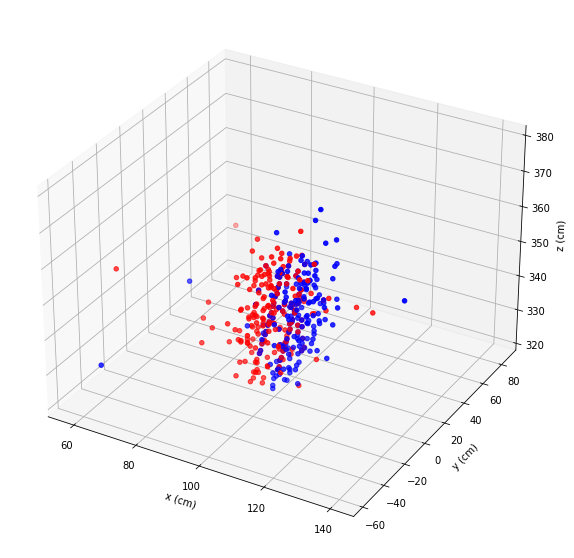

In [52]:
eid = 3

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x (cm)")
ax.set_ylabel("y (cm)")
ax.set_zlabel("z (cm)")

c = ["red" if p == 0 else "blue" for p in l[eid]]

ax.scatter(x[eid], y[eid], z[eid], c=c)

plt.show()

In [56]:
ds = uproot.recreate("data/hits_100e_photon.root")
ds["hits"] = {
    "vertices_x": x,
    "vertices_y": y,
    "vertices_z": z,
    "trackster_label": l,
    "trackster_event": e,
}
ds.close()